## EDA 

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
#lectura del archivo excel
df=pd.read_excel(r"BBDD_Hospitalización.xlsx")

C:\Users\m_evi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [24]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [25]:
df.isna().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [26]:
#Información general:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [48]:

df.columns 

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC', 'ENF. CRONICA PULMONAR OBSTRUCTIVA tipo',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'],
      dtype='object')

In [49]:
df.shape

(570, 22)

In [27]:
#Resumen estadístico:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [28]:
#Transformacion de datos:
df['DIABETES'] = df['DIABETES'].astype('category')
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].astype('category')
df['BIOPSIAS PREVIAS']=df['BIOPSIAS PREVIAS'].astype('category')
df['VOLUMEN PROSTATICO']=df['VOLUMEN PROSTATICO'].astype('category')
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS']=df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].astype('category')
df['CUP'] = df['CUP'].astype('category')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].astype('category')
df['BIOPSIA']=df['BIOPSIA'].astype('category')
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']=df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype('category')
df['FIEBRE']=df['FIEBRE']
df['ITU']=df['ITU'].astype('category')
df['TIPO DE CULTIVO']=df['TIPO DE CULTIVO'].astype('str')
df['AGENTE AISLADO']=df['AGENTE AISLADO'].astype('str')
df['PATRON DE RESISTENCIA'] =df['PATRON DE RESISTENCIA'].astype('category')
df['HOSPITALIZACION']=df['HOSPITALIZACION'].astype('category')
#Información general:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype   
---  ------                                                                     --------------  -----   
 0   EDAD                                                                       568 non-null    float64 
 1   DIABETES                                                                   568 non-null    category
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    category
 3   PSA                                                                        564 non-null    float64 
 4   BIOPSIAS PREVIAS                                                           566 non-null    category
 5   VOLUMEN PROSTATICO                                                         567 non-null    category
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS           

#Variables cuantitativas:       

In [29]:
#Resumen estadístico:
df.describe(include=['category', 'object'])

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
count,568,568,566,567,568,567,566,568,568,568,568,570,570,568,565
unique,2,2,2,2,5,2,4,11,6,2,2,5,4,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO
freq,505,563,510,408,448,563,546,322,542,531,562,560,543,561,541


In [30]:
#Estandarizacion y correccion por columnas:

Campo "ANTIBIOTICO UTILIZADO EN LA PROFILAXIS"

In [31]:
list(df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].unique())

['FLUOROQUINOLONA_AMINOGLICOSIDO',
 'CEFALOSPORINA_AMINOGLUCOCIDO',
 'OROQUINOLONAS',
 'FLUOROQUINOLONA_AMINOGLICÓSIDO',
 'OTROS',
 nan]

In [32]:
# 1. Corregimos el nombre de la columna
df = df.rename(columns={"ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": "ANTIBIOTICO UTILIZADO EN LA PROFILAXIS"})
# 2. Corregimos los valores duplicados
df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICOSIDO','FLUOROQUINOLONA_AMINOGLICÓSIDO' )
list(df['ANTIBIOTICO UTILIZADO EN LA PROFILAXIS'].unique())

['FLUOROQUINOLONA_AMINOGLICÓSIDO',
 'CEFALOSPORINA_AMINOGLUCOCIDO',
 'OROQUINOLONAS',
 'OTROS',
 nan]

Campo "ENF. CRONICA PULMONAR OBSTRUCTIVA"

In [37]:
# Crearemos una columna que ayude a segmentar la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
# 1. Duplicamos la columna
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].copy()

In [36]:
# 2. Corregimos la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace({'SI, EPOC','SI, ASMA'},'SI')

In [38]:
# 3. Corregimos la columa 'ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, EPOC','EPOC')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, ASMA','ASMA')

Campo "BIOPSIA"

In [39]:
# Corregiremos la columna, recortando los espacios a los costados
df['BIOPSIA']=df['BIOPSIA'].str.strip()

Campo "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"

In [40]:
list(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].unique())

[1, 2, 3, 5, 9, 'NO', nan]

Campo "TIPO DE CULTIVO"

In [41]:

list(df['TIPO DE CULTIVO'].unique())

['NO', 'HEMOCULTIVO', 'UROCULTIVO', 'HEMOCULTIVO Y UROCULTIVO', 'nan']

Campo "AGENTE AISLADO"

In [43]:

df['AGENTE AISLADO']=df['AGENTE AISLADO'].replace('nan',)

C:\Users\m_evi\AppData\Local\Temp\ipykernel_50376\3174203160.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['AGENTE AISLADO']=df['AGENTE AISLADO'].replace('nan',)


In [44]:

list(df['AGENTE AISLADO'].unique())

['NO', 'E.COLI', 'PSEUDOMONAS AERUGINOSA']

Estandarizacion de Nulos

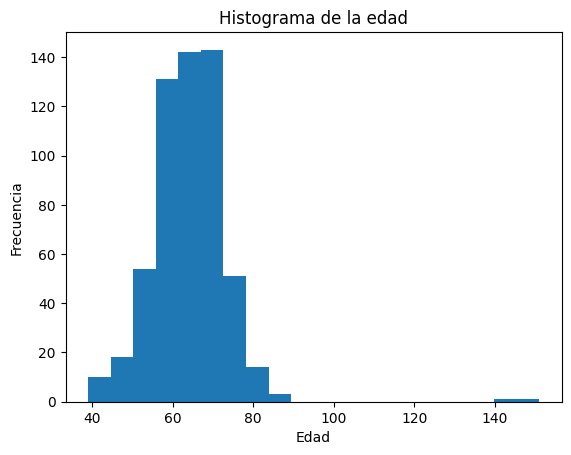

In [51]:
import matplotlib.pyplot as plt

# Crea un histograma de la variable EDAD
plt.hist(df['EDAD'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la edad')
plt.show()

In [45]:

list(df['PATRON DE RESISTENCIA'].unique())

['NO',
 ' AMPI R, CIPRO R, GENTA R, SULFA M R',
 'RESISTENTE A AMPI, CIPRO Y GENTA',
 'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
 'MULTI SENSIBLE',
 nan]

Campo "PATRON DE RESISTENCIA"

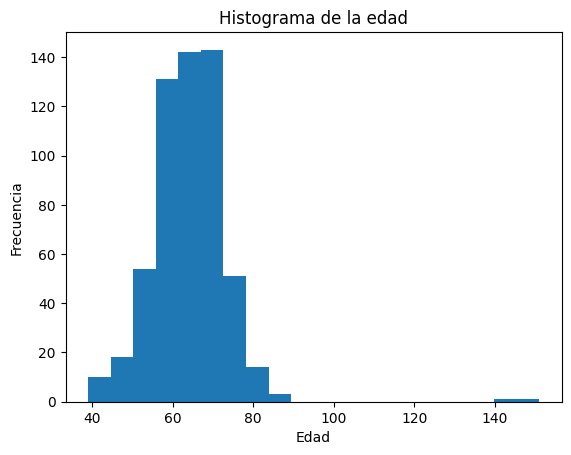

In [47]:
import matplotlib.pyplot as plt

# Crea un histograma de la variable EDAD
plt.hist(df['EDAD'], bins=20)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la edad')
plt.show()